# Hot Gas Mass - Temperature Relation

In this notebook we make a simple comparison of X-ray derived hot gas-mass and temperatures to literature, both measured during the course of this work. Our data are such that it is not particularly helpful to fit our own scaling relation, but we can overplot them on top of previously measured relations.

## Import Statements

In [25]:
import numpy as np
from astropy.units import Quantity
import pandas as pd
pd.set_option('display.max_columns', 500)
import pickle

from xga.products.relation import ScalingRelation
from xga.relations.clusters.LT import xcs_sdss_r500_52, xcs_sdss_r2500_52
from xga.models.misc import power_law
from xga.utils import DEFAULT_COSMO

%matplotlib inline

## Loading data tables

We load our measurements of X-ray temperature and luminosity. We choose the 'standard mode' pipeline run (luminosities are broadly consistent with other modes for this sample), with measurements made within $R_{500}$ (as were those of the scaling relations we compare to):

In [2]:
xray_prop = pd.read_csv("../../outputs/results/ltr_r500_pipeline_results.csv")
xray_prop

,name,ra,dec,redshift,r500,r500+-,Tx500,Tx500-,Tx500+,Lx500_0.5-2.0,...,Lx500_0.01-100.0+,Tx500ce,Tx500ce-,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+
0,25124A,243.629055,26.730240,0.186,867.647767,39.128436,3.817000,0.287230,0.326195,7.396831e+43,...,7.694207e+42,4.240060,0.463875,0.698658,4.661778e+43,1.474055e+42,1.136021e+42,1.407295e+44,1.243112e+43,8.999482e+42
1,25124B,243.504000,26.691000,0.186,665.433860,93.790303,2.121080,0.453657,1.097385,4.858143e+42,...,1.947342e+42,1.668870,0.571085,1.111938,3.756145e+42,5.779736e+41,7.552022e+41,7.921396e+42,1.571571e+42,1.660467e+42
2,25124C,243.541000,26.648000,0.186,504.349762,26.563232,1.505450,0.118645,0.157002,4.980125e+42,...,1.368388e+42,1.475180,0.123717,0.146730,4.692879e+42,3.996000e+41,5.333483e+41,9.510069e+42,9.116242e+41,1.309781e+42
3,44739,229.793620,28.331750,0.118,426.978169,22.844914,1.024810,0.066587,0.081072,2.328422e+42,...,5.811503e+41,0.993314,0.088181,0.086573,1.873450e+42,2.306554e+41,2.767644e+41,3.233224e+42,3.960150e+41,4.341351e+41
4,19670AB,150.226402,50.800565,0.134,527.139938,30.952352,1.978950,0.341111,0.660766,3.495482e+42,...,1.398974e+42,1.561920,0.179030,0.293561,2.992024e+42,3.335254e+41,3.754196e+41,6.209580e+42,1.028791e+42,1.035156e+42
5,19670A,150.256710,50.793942,0.134,462.177328,27.670531,1.252010,0.113311,0.139826,1.581114e+42,...,7.445787e+41,1.333620,0.148756,0.199910,1.176707e+42,3.641293e+41,3.858331e+41,2.310265e+42,7.379632e+41,6.230597e+41
6,19670B,150.214920,50.805014,0.134,591.610814,44.926843,1.907300,0.243713,0.425694,4.533795e+42,...,1.244323e+42,1.652700,0.244968,0.313360,3.512372e+42,3.266195e+41,5.632695e+41,7.421187e+42,8.747499e+41,8.987884e+41
7,19670C,150.065000,50.746000,0.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19670D,150.168000,50.686000,0.134,359.762893,58.758058,0.326002,0.070427,0.247115,7.776962e+41,...,3.734298e+41,0.246174,0.060497,0.107147,6.906259e+41,4.756693e+41,1.577939e+41,1.729986e+42,1.048810e+42,5.710794e+41
9,12833A,129.496800,44.248700,0.145,484.161429,22.267250,1.394590,0.098024,0.113226,3.419655e+42,...,7.096560e+41,1.416080,0.145301,0.239000,2.240773e+42,3.645432e+41,2.770394e+41,4.498901e+42,7.032202e+41,5.884023e+41


We also read in the results for measurements within $R_{2500}$:

In [5]:
r2500_xray_prop = pd.read_csv("../../outputs/results/ltr_r2500_pipeline_results.csv")
r2500_xray_prop

,name,ra,dec,redshift,r2500,r2500+-,Tx2500,Tx2500-,Tx2500+,Lx2500_0.5-2.0,Lx2500_0.5-2.0-,Lx2500_0.5-2.0+,Lx2500_0.01-100.0,Lx2500_0.01-100.0-,Lx2500_0.01-100.0+
0,25124A,243.629055,26.730240,0.186,365.267017,12.695384,3.432990,0.199900,0.224862,5.684199e+43,9.328982e+41,7.039906e+41,1.557472e+44,6.391164e+42,5.653323e+42
1,25124B,243.504000,26.691000,0.186,295.146881,21.744896,2.436460,0.310357,0.501707,4.010473e+42,1.946695e+41,3.563156e+41,9.572086e+42,9.907068e+41,9.034255e+41
2,25124C,243.541000,26.648000,0.186,277.034520,17.832455,2.127920,0.232797,0.334217,3.508063e+42,2.857552e+41,2.400971e+41,7.990368e+42,7.651462e+41,1.037325e+42
3,44739,229.793620,28.331750,0.118,194.267792,10.767873,1.039640,0.096475,0.089941,9.528051e+41,9.171794e+40,9.713496e+40,1.678464e+42,1.781575e+41,1.921459e+41
4,19670AB,150.226402,50.800565,0.134,268.602778,14.841276,1.963400,0.189759,0.250979,2.716377e+42,1.249930e+41,2.240797e+41,6.054734e+42,3.400940e+41,4.140629e+41
5,19670A,150.256710,50.793942,0.134,226.586944,20.569370,1.336860,0.199435,0.305279,9.952690e+41,1.093715e+41,1.538825e+41,1.955903e+42,3.672504e+41,2.918419e+41
6,19670B,150.214920,50.805014,0.134,291.763176,18.418645,2.030280,0.189614,0.278329,3.426424e+42,1.232967e+41,2.064824e+41,7.719305e+42,5.850740e+41,5.725601e+41
7,19670C,150.065000,50.746000,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19670D,150.168000,50.686000,0.134,297.870281,35.940312,2.660770,0.628359,1.435512,2.032401e+42,1.613658e+41,2.507279e+41,5.028950e+42,8.245194e+41,1.005192e+42
9,12833A,129.496800,44.248700,0.145,225.358513,8.326291,1.407540,0.064927,0.073594,3.001651e+42,1.847982e+41,1.956755e+41,6.013372e+42,3.462115e+41,3.562511e+41


Now the measurements of gas mass - the first of these tables contains gas mass measurements from density profiles that were generated with PSF correction turned on, the second with it turned off. 

In [35]:
gas_masses = pd.read_csv("../../outputs/results/all_hot_gm_measurements.csv")
gas_masses

,name,gm500,gm500-,gm500+,gm2500,gm2500-,gm2500+,gm_froztemp500,gm_froztemp500-,gm_froztemp500+,gm_froztemp2500,gm_froztemp2500-,gm_froztemp2500+
0,25124A,2.6943,0.1392,0.1378,0.9038,0.0464,0.0447,2.7098,0.0555,0.0558,1.0504,0.0224,0.0217
1,25124B,0.0715,0.0087,0.0089,0.0566,0.0054,0.0058,0.0701,0.0080,0.0080,0.0518,0.0043,0.0046
2,25124C,0.2309,0.0222,0.0236,0.0634,0.0100,0.0113,0.2829,0.0197,0.0219,0.0506,0.0052,0.0055
3,44739,0.0050,0.0009,0.0015,0.0049,0.0008,0.0011,0.0050,0.0009,0.0015,0.0049,0.0008,0.0013
4,19670AB,0.0986,0.0067,0.0071,0.0597,0.0048,0.0049,0.0991,0.0066,0.0071,0.0576,0.0036,0.0036
5,19670A,0.0143,0.0019,0.0024,0.0138,0.0015,0.0017,0.0143,0.0019,0.0024,0.0138,0.0016,0.0017
6,19670B,0.0458,0.0030,0.0032,0.0419,0.0021,0.0021,0.0457,0.0030,0.0031,0.0407,0.0019,0.0019
7,19670D,0.0886,0.0122,0.0136,0.0779,0.0101,0.0102,0.1019,0.0128,0.0159,0.0649,0.0050,0.0052
8,12833A,0.1527,0.0103,0.0109,0.0573,0.0031,0.0032,0.1812,0.0116,0.0125,0.0729,0.0037,0.0038
9,12833B,0.0386,0.0048,0.0064,NaN,NaN,NaN,0.0387,0.0049,0.0069,NaN,NaN,NaN


In [38]:
nopsf_gas_masses = pd.read_csv("../../outputs/results/nopsf_all_hot_gm_measurements.csv")
nopsf_gas_masses

,name,gm500,gm500-,gm500+,gm2500,gm2500-,gm2500+,gm_froztemp500,gm_froztemp500-,gm_froztemp500+,gm_froztemp2500,gm_froztemp2500-,gm_froztemp2500+
0,25124A,3.0544,0.1565,0.1503,1.0177,0.0524,0.0533,3.0731,0.0618,0.0633,1.1873,0.0250,0.0253
1,25124B,0.1412,0.0115,0.0119,0.0954,0.0082,0.0080,0.1353,0.0091,0.0089,0.0838,0.0048,0.0049
2,25124C,0.3385,0.0326,0.0325,0.0897,0.0144,0.0152,0.4199,0.0258,0.0260,0.0707,0.0067,0.0072
3,44739,0.0307,0.0065,0.0068,0.0147,0.0018,0.0018,0.0386,0.0097,0.0102,0.0188,0.0027,0.0026
4,19670AB,0.2189,0.0114,0.0115,0.0925,0.0095,0.0096,0.2205,0.0092,0.0096,0.0876,0.0062,0.0063
5,19670A,0.0766,0.0132,0.0144,0.0286,0.0043,0.0048,0.0776,0.0132,0.0151,0.0287,0.0032,0.0034
6,19670B,0.1667,0.0128,0.0142,0.0874,0.0069,0.0068,0.1612,0.0098,0.0102,0.0779,0.0039,0.0041
7,19670D,0.0995,0.0129,0.0141,0.0878,0.0108,0.0108,0.1147,0.0141,0.0171,0.0738,0.0049,0.0051
8,12833A,0.2292,0.0159,0.0170,0.0713,0.0041,0.0043,0.2823,0.0177,0.0181,0.0948,0.0052,0.0053
9,12833B,0.0661,0.0113,0.0117,NaN,NaN,NaN,0.0690,0.0131,0.0139,NaN,NaN,NaN


### Joining tables

In [40]:
r500_props = pd.mergea(xray_prop, gas_masses, left_on='name', right_on='name', how='outer')
r500_props = pd.merge(r500_props, nopsf_gas_masses.add_prefix('nopsf_'), left_on='name', 
                      right_on='nopsf_name', how='outer')
del r500_props['nopsf_name']
r500_props

,name,ra,dec,redshift,r500,r500+-,Tx500,Tx500-,Tx500+,Lx500_0.5-2.0,Lx500_0.5-2.0-,Lx500_0.5-2.0+,Lx500_0.01-100.0,Lx500_0.01-100.0-,Lx500_0.01-100.0+,Tx500ce,Tx500ce-,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+,gm500,gm500-,gm500+,gm2500,gm2500-,gm2500+,gm_froztemp500,gm_froztemp500-,gm_froztemp500+,gm_froztemp2500,gm_froztemp2500-,gm_froztemp2500+,nopsf_gm500,nopsf_gm500-,nopsf_gm500+,nopsf_gm2500,nopsf_gm2500-,nopsf_gm2500+,nopsf_gm_froztemp500,nopsf_gm_froztemp500-,nopsf_gm_froztemp500+,nopsf_gm_froztemp2500,nopsf_gm_froztemp2500-,nopsf_gm_froztemp2500+
0,12833A,129.496800,44.248700,0.145,484.161429,22.267250,1.394590,0.098024,0.113226,3.419655e+42,4.326240e+41,2.991426e+41,6.828256e+42,9.969550e+41,7.096560e+41,1.416080,0.145301,0.239000,2.240773e+42,3.645432e+41,2.770394e+41,4.498901e+42,7.032202e+41,5.884023e+41,0.1527,0.0103,0.0109,0.0573,0.0031,0.0032,0.1812,0.0116,0.0125,0.0729,0.0037,0.0038,0.2292,0.0159,0.0170,0.0713,0.0041,0.0043,0.2823,0.0177,0.0181,0.0948,0.0052,0.0053
1,12833B,129.445000,44.379000,0.145,435.477156,26.364544,1.161630,0.135227,0.116765,2.511945e+42,2.677573e+41,3.283677e+41,4.654556e+42,7.296128e+41,8.407739e+41,0.926943,0.120020,0.134047,1.378771e+42,3.555113e+41,3.233896e+41,2.309754e+42,5.456964e+41,3.761557e+41,0.0386,0.0048,0.0064,NaN,NaN,NaN,0.0387,0.0049,0.0069,NaN,NaN,NaN,0.0661,0.0113,0.0117,NaN,NaN,NaN,0.0690,0.0131,0.0139,NaN,NaN,NaN
2,19670A,150.256710,50.793942,0.134,462.177328,27.670531,1.252010,0.113311,0.139826,1.581114e+42,2.128492e+41,3.223873e+41,3.026369e+42,7.463168e+41,7.445787e+41,1.333620,0.148756,0.199910,1.176707e+42,3.641293e+41,3.858331e+41,2.310265e+42,7.379632e+41,6.230597e+41,0.0143,0.0019,0.0024,0.0138,0.0015,0.0017,0.0143,0.0019,0.0024,0.0138,0.0016,0.0017,0.0766,0.0132,0.0144,0.0286,0.0043,0.0048,0.0776,0.0132,0.0151,0.0287,0.0032,0.0034
3,19670AB,150.226402,50.800565,0.134,527.139938,30.952352,1.978950,0.341111,0.660766,3.495482e+42,3.820188e+41,5.467797e+41,7.810693e+42,9.568825e+41,1.398974e+42,1.561920,0.179030,0.293561,2.992024e+42,3.335254e+41,3.754196e+41,6.209580e+42,1.028791e+42,1.035156e+42,0.0986,0.0067,0.0071,0.0597,0.0048,0.0049,0.0991,0.0066,0.0071,0.0576,0.0036,0.0036,0.2189,0.0114,0.0115,0.0925,0.0095,0.0096,0.2205,0.0092,0.0096,0.0876,0.0062,0.0063
4,19670B,150.214920,50.805014,0.134,591.610814,44.926843,1.907300,0.243713,0.425694,4.533795e+42,3.011521e+41,5.608558e+41,1.001424e+43,9.733266e+41,1.244323e+42,1.652700,0.244968,0.313360,3.512372e+42,3.266195e+41,5.632695e+41,7.421187e+42,8.747499e+41,8.987884e+41,0.0458,0.0030,0.0032,0.0419,0.0021,0.0021,0.0457,0.0030,0.0031,0.0407,0.0019,0.0019,0.1667,0.0128,0.0142,0.0874,0.0069,0.0068,0.1612,0.0098,0.0102,0.0779,0.0039,0.0041
5,19670C,150.065000,50.746000,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19670D,150.168000,50.686000,0.134,359.762893,58.758058,0.326002,0.070427,0.247115,7.776962e+41,4.208098e+41,1.206647e+41,1.484812e+42,7.575129e+41,3.734298e+41,0.246174,0.060497,0.107147,6.906259e+41,4.756693e+41,1.577939e+41,1.729986e+42,1.048810e+42,5.710794e+41,0.0886,0.0122,0.0136,0.0779,0.0101,0.0102,0.1019,0.0128,0.0159,0.0649,0.0050,0.0052,0.0995,0.0129,0.0141,0.0878,0.0108,0.0108,0.1147,0.0141,0.0171,0.0738,0.0049,0.0051
7,25124A,243.629055,26.730240,0.186,867.647767,39.128436,3.817000,0.287230,0.326195,7.396831e+43,1.360925e+42,1.402886e+42,2.126068e+44,1.169875e+43,7.694207e+42,4.240060,0.463875,0.698658,4.661778e+43,1.474055e+42,1.136021e+42,1.407295e+44,1.243112e+43,8.999482e+42,2.6943,0.1392,0.1378,0.9038,0.0464,0.0447,2.7098,0.0555,0.0558,1.0504,0.0224,0.0217,3.0544,0.1565,0.1503,1.0177,0.0524,0.0533,3.0731,0.0618,0.0633,1.1873,0.0250,0.0253
8,25124B,243.504000,26.691000,0.186,665.433860,93.790303,2.121080,0.453657,1.097385,4.858143e+42,5.199192e+41,8.079419e+41,1.105362e+43,1.37

In [41]:
r2500_props = pd.merge(r2500_xray_prop, gas_masses, left_on='name', right_on='name', how='outer')
r2500_props = pd.merge(r2500_props, nopsf_gas_masses.add_prefix('nopsf_'), left_on='name', 
                      right_on='nopsf_name', how='outer')
del r2500_props['nopsf_name']
r2500_props

,name,ra,dec,redshift,r2500,r2500+-,Tx2500,Tx2500-,Tx2500+,Lx2500_0.5-2.0,Lx2500_0.5-2.0-,Lx2500_0.5-2.0+,Lx2500_0.01-100.0,Lx2500_0.01-100.0-,Lx2500_0.01-100.0+,gm500,gm500-,gm500+,gm2500,gm2500-,gm2500+,gm_froztemp500,gm_froztemp500-,gm_froztemp500+,gm_froztemp2500,gm_froztemp2500-,gm_froztemp2500+,nopsf_gm500,nopsf_gm500-,nopsf_gm500+,nopsf_gm2500,nopsf_gm2500-,nopsf_gm2500+,nopsf_gm_froztemp500,nopsf_gm_froztemp500-,nopsf_gm_froztemp500+,nopsf_gm_froztemp2500,nopsf_gm_froztemp2500-,nopsf_gm_froztemp2500+
0,12833A,129.496800,44.248700,0.145,225.358513,8.326291,1.407540,0.064927,0.073594,3.001651e+42,1.847982e+41,1.956755e+41,6.013372e+42,3.462115e+41,3.562511e+41,0.1527,0.0103,0.0109,0.0573,0.0031,0.0032,0.1812,0.0116,0.0125,0.0729,0.0037,0.0038,0.2292,0.0159,0.0170,0.0713,0.0041,0.0043,0.2823,0.0177,0.0181,0.0948,0.0052,0.0053
1,12833B,129.445000,44.379000,0.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0386,0.0048,0.0064,NaN,NaN,NaN,0.0387,0.0049,0.0069,NaN,NaN,NaN,0.0661,0.0113,0.0117,NaN,NaN,NaN,0.0690,0.0131,0.0139,NaN,NaN,NaN
2,19670A,150.256710,50.793942,0.134,226.586944,20.569370,1.336860,0.199435,0.305279,9.952690e+41,1.093715e+41,1.538825e+41,1.955903e+42,3.672504e+41,2.918419e+41,0.0143,0.0019,0.0024,0.0138,0.0015,0.0017,0.0143,0.0019,0.0024,0.0138,0.0016,0.0017,0.0766,0.0132,0.0144,0.0286,0.0043,0.0048,0.0776,0.0132,0.0151,0.0287,0.0032,0.0034
3,19670AB,150.226402,50.800565,0.134,268.602778,14.841276,1.963400,0.189759,0.250979,2.716377e+42,1.249930e+41,2.240797e+41,6.054734e+42,3.400940e+41,4.140629e+41,0.0986,0.0067,0.0071,0.0597,0.0048,0.0049,0.0991,0.0066,0.0071,0.0576,0.0036,0.0036,0.2189,0.0114,0.0115,0.0925,0.0095,0.0096,0.2205,0.0092,0.0096,0.0876,0.0062,0.0063
4,19670B,150.214920,50.805014,0.134,291.763176,18.418645,2.030280,0.189614,0.278329,3.426424e+42,1.232967e+41,2.064824e+41,7.719305e+42,5.850740e+41,5.725601e+41,0.0458,0.0030,0.0032,0.0419,0.0021,0.0021,0.0457,0.0030,0.0031,0.0407,0.0019,0.0019,0.1667,0.0128,0.0142,0.0874,0.0069,0.0068,0.1612,0.0098,0.0102,0.0779,0.0039,0.0041
5,19670C,150.065000,50.746000,0.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19670D,150.168000,50.686000,0.134,297.870281,35.940312,2.660770,0.628359,1.435512,2.032401e+42,1.613658e+41,2.507279e+41,5.028950e+42,8.245194e+41,1.005192e+42,0.0886,0.0122,0.0136,0.0779,0.0101,0.0102,0.1019,0.0128,0.0159,0.0649,0.0050,0.0052,0.0995,0.0129,0.0141,0.0878,0.0108,0.0108,0.1147,0.0141,0.0171,0.0738,0.0049,0.0051
7,25124A,243.629055,26.730240,0.186,365.267017,12.695384,3.432990,0.199900,0.224862,5.684199e+43,9.328982e+41,7.039906e+41,1.557472e+44,6.391164e+42,5.653323e+42,2.6943,0.1392,0.1378,0.9038,0.0464,0.0447,2.7098,0.0555,0.0558,1.0504,0.0224,0.0217,3.0544,0.1565,0.1503,1.0177,0.0524,0.0533,3.0731,0.0618,0.0633,1.1873,0.0250,0.0253
8,25124B,243.504000,26.691000,0.186,295.146881,21.744896,2.436460,0.310357,0.501707,4.010473e+42,1.946695e+41,3.563156e+41,9.572086e+42,9.907068e+41,9.034255e+41,0.0715,0.0087,0.0089,0.0566,0.0054,0.0058,0.0701,0.0080,0.0080,0.0518,0.0043,0.0046,0.1412,0.0115,0.0119,0.0954,0.0082,0.0080,0.1353,0.0091,0.0089,0.0838,0.0048,0.0049
9,25124C,243.541000,26.648000,0.186,277.034520,17.832455,2.127920,0.232797,0.334217,3.508063e+42,2.857552e+41,2.400971e+41,7.990368e+42,7.651462e+41,1.037325e+42,0.2309,0.0222,0.0236,0.0634,0.0100,0.0113,0.2829,0.0197,0.0219,0.0506,0.0052,0.0055,0.3385,0.0326,0.0325,0.0897,0.0144,0.0152,0.4199,0.0258,0.0260,0.0707,0.0067,0.0072


## Reading in literature scaling relation

Here we read in a scaling relation based on data from [Lovisari et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...892..102L/abstract) - we will use this to briefly compare to our measurements.

In [62]:
with open('lovisari_gasmassVStx_R500_xgav0.5.xgarel', 'rb') as scalo:
    lovisari_gmass_tx = pickle.load(scalo)
lovisari_gmass_tx.model_colour = "darkolivegreen"

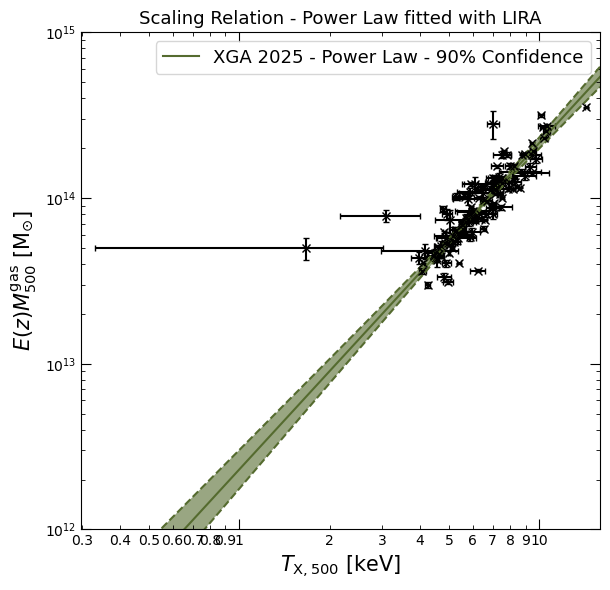

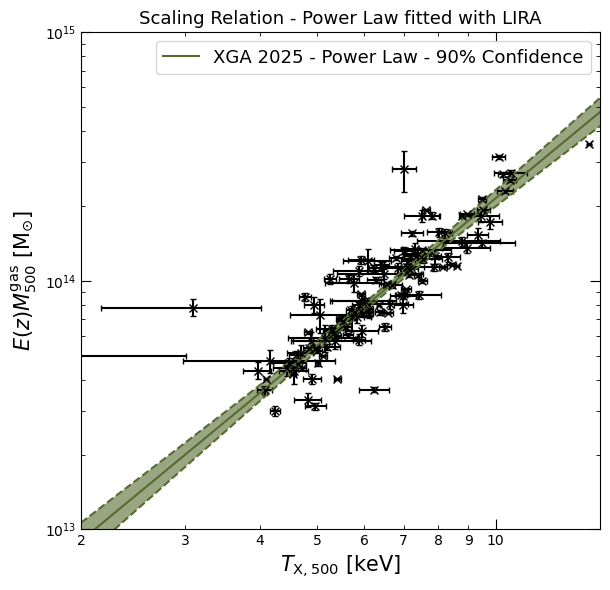

In [23]:
lovisari_gmass_tx.view(y_lims=Quantity([1e+12, 1e+15], 'Msun'), figsize=(6.2, 6))
lovisari_gmass_tx.view(y_lims=Quantity([1e+13, 1e+15], 'Msun'), x_lims=Quantity([2, 15], 'keV'), figsize=(6.2, 6))

## Comparing to a scaling relation from literature

Here we compare our measurements to an existing scaling relation

### Setting up astropy quantities

We need to get the data points ready for over-plotting on the scaling relations. This involves reading them out of the data table and putting them in astropy quantities. We make sure to multiply the gas mass by the E(z) factor calculated from the group redshifts.

In [43]:
e = DEFAULT_COSMO.efunc(r500_props['redshift'].values)
# These are the gas masses measured with PSF correction turned on, the standard practise
mgas = Quantity(r500_props[['gm500', 'gm500-', 'gm500+']].values*1e+13, 
              'Msun')*e[..., None]

# Here we prepare the ones measured WITHOUT PSF correction
nopsf_mgas = Quantity(r500_props[['nopsf_gm500', 'nopsf_gm500-', 'nopsf_gm500+']].values*1e+13, 
              'Msun')*e[..., None]

tx = Quantity(r500_props[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

We do not compare to an equivalent $R_{2500}$ scaling relation, as Lovisari et al. did not make measurements within $R_{2500}$, though we still wish to plot the relation between our gas masses and temperatures within this aperture, so we prepare the data the same way as above.

In [45]:
e = DEFAULT_COSMO.efunc(r2500_props['redshift'].values)
# These are the gas masses measured with PSF correction turned on, the standard practise
r2500_mgas = Quantity(r2500_props[['gm2500', 'gm2500-', 'gm2500+']].values*1e+13, 'Msun')*e[..., None]

# Here we prepare the ones measured WITHOUT PSF correction
nopsf_r2500_mgas = Quantity(r2500_props[['nopsf_gm2500', 'nopsf_gm2500-', 'nopsf_gm2500+']].values*1e+13, 
                            'Msun')*e[..., None]

r2500_tx = Quantity(r2500_props[['Tx2500', 'Tx2500-', 'Tx2500+']].values, 'keV')

## Plotting our data

Here we make use of the scaling relation objects that we just defined to illustrate how our data compare to the literature relations. 

**We alter the scaling relation object that we loaded in earlier, and replace the Lovisari data points it was fit from with the values that we have measured in this work**

### Gas mass within $R_{500}$ - PSF Correction ON

First off, we'll look at how the gas masses we measured for our groups with PSF correction **on** compare to the scaling relation from literature - the $T_{\rm{X}}$ values for the PSF on and off gas masses are the same.

In [64]:
lovisari_gmass_tx._y_data = mgas[:, 0]
lovisari_gmass_tx._y_err = mgas[:, 1]

lovisari_gmass_tx._x_data = tx[:, 0]
lovisari_gmass_tx._x_err = tx[:, 1]

lovisari_gmass_tx._point_names = r500_props['name'].values

lovisari_gmass_tx.author = 'Lovisari et al.'
lovisari_gmass_tx.year = 2020

#### Labelling our data points for context

First of all, we plot the scaling relation with data points labelled - so it is easy to link particular points to particular groups/clusters:

In [58]:
{n_ind: n for n_ind, n in enumerate(lovisari_gmass_tx.point_names)}

{0: '12833A',
 1: '12833B',
 2: '19670A',
 3: '19670AB',
 4: '19670B',
 5: '19670C',
 6: '19670D',
 7: '25124A',
 8: '25124B',
 9: '25124C',
 10: '44739',
 11: '44858',
 12: '50433',
 13: 'J083829.2+441904.8',
 14: 'J215437.2-091532.4',
 15: 'J215504.8-093520'}

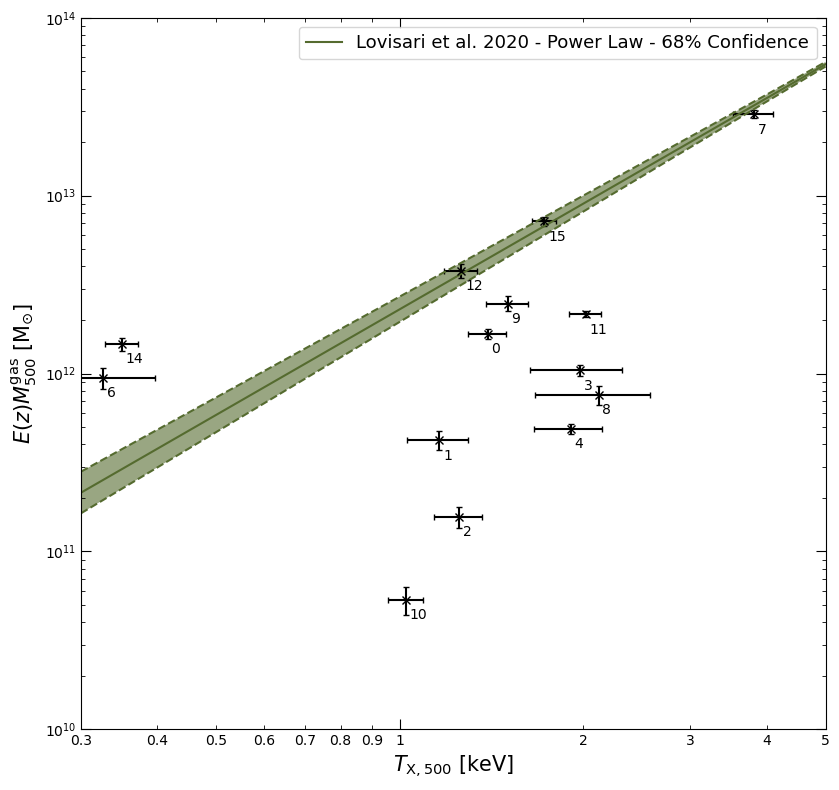

In [65]:
lovisari_gmass_tx.view(x_lims=Quantity([0.3, 5], 'keV'), y_lims=Quantity([1e+10, 1e+14], 'Msun'), log_scale=True, 
                       label_points=True, conf_level=68, plot_title='', figsize=(8.5, 8), 
                       point_label_offset=(0.005, -0.008), 
                       save_path="../../outputs/figures/mgas_tx_relation_comp_pntlab.pdf")

#### Comparing data to the relation without labels

This generates the same plot as above, but without the point labels:

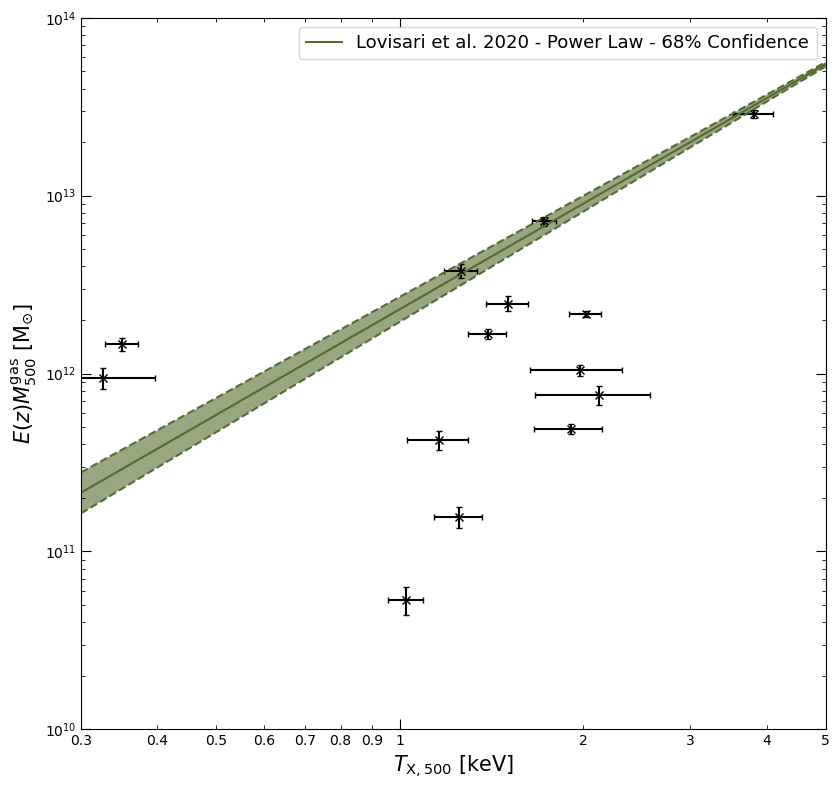

In [67]:
lovisari_gmass_tx.view(x_lims=Quantity([0.3, 5], 'keV'), y_lims=Quantity([1e+10, 1e+14], 'Msun'), log_scale=True, 
                       label_points=False, conf_level=68, plot_title='', figsize=(8.5, 8), 
                       point_label_offset=(0.005, -0.008), 
                       save_path="../../outputs/figures/mgas_tx_relation_comp.pdf")

### Gas mass within $R_{500}$ - PSF Correction OFF

Now we move on to the gas masses measured with PSF correction turned **off** - we are only bothering with this comparison because we have noted that PSF *correction* methods can have diminished performance when the target group/cluster is low signal-to-noise. Again, the $T_{\rm{X}}$ values here are the same as were used for the previous comparison.

In [71]:
lovisari_gmass_tx._y_data = nopsf_mgas[:, 0]
lovisari_gmass_tx._y_err = nopsf_mgas[:, 1]

#### Labelling our data points for context

Same as before, we first plot the scaling relation with data points labelled - so it is easy to link particular points to particular groups/clusters:

In [68]:
{n_ind: n for n_ind, n in enumerate(lovisari_gmass_tx.point_names)}

{0: '12833A',
 1: '12833B',
 2: '19670A',
 3: '19670AB',
 4: '19670B',
 5: '19670C',
 6: '19670D',
 7: '25124A',
 8: '25124B',
 9: '25124C',
 10: '44739',
 11: '44858',
 12: '50433',
 13: 'J083829.2+441904.8',
 14: 'J215437.2-091532.4',
 15: 'J215504.8-093520'}

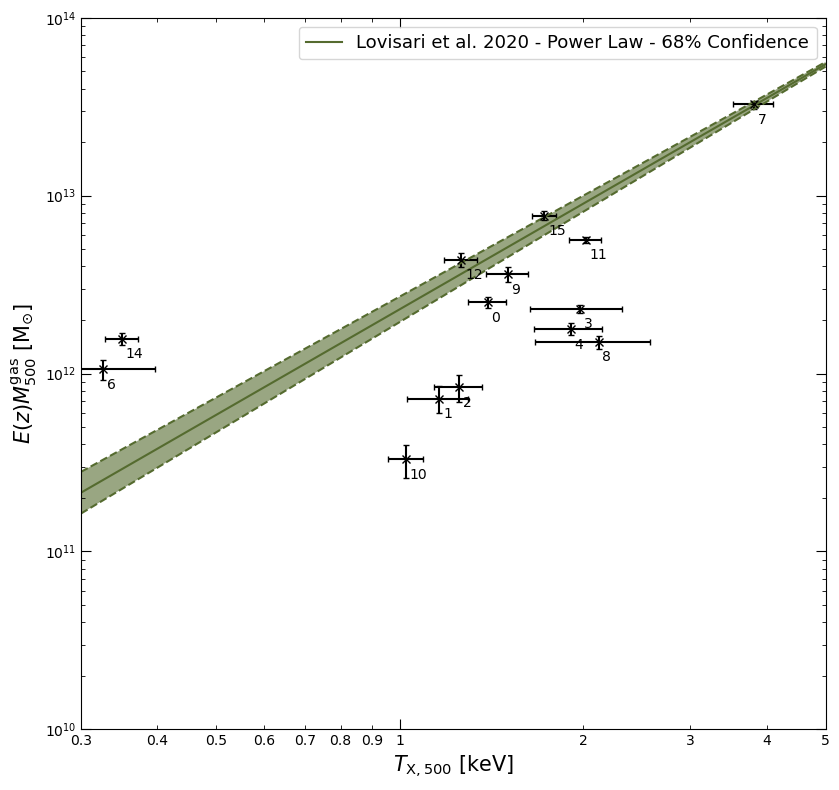

In [72]:
lovisari_gmass_tx.view(x_lims=Quantity([0.3, 5], 'keV'), y_lims=Quantity([1e+10, 1e+14], 'Msun'), log_scale=True, 
                       label_points=True, conf_level=68, plot_title='', figsize=(8.5, 8), 
                       point_label_offset=(0.005, -0.008), 
                       save_path="../../outputs/figures/nopsf_mgas_tx_relation_comp_pntlab.pdf")

#### Comparing data to the relation without labels

This generates the same plot as above, but without the point labels:

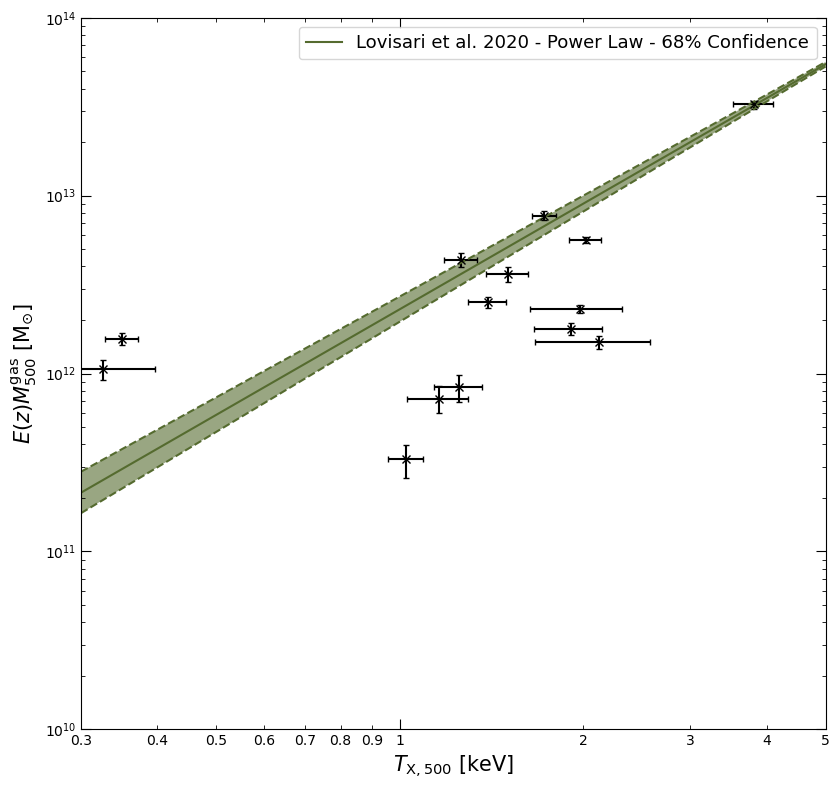

In [73]:
lovisari_gmass_tx.view(x_lims=Quantity([0.3, 5], 'keV'), y_lims=Quantity([1e+10, 1e+14], 'Msun'), log_scale=True, 
                       label_points=False, conf_level=68, plot_title='', figsize=(8.5, 8), 
                       point_label_offset=(0.005, -0.008), 
                       save_path="../../outputs/figures/nopsf_mgas_tx_relation_comp.pdf")